<a href="https://colab.research.google.com/github/IvanGoyena/ARCHIVOS-CSV/blob/main/ProyectoParte2IvanRodriguezGoyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 🔹 Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 🔹 Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# 🔹 Vista general del dataset
print("Primeras filas del dataset:")
display(df.head())

# 🔹 Dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# 🔹 Información general
print("\nInformación del dataset:")
df.info()

# 🔹 Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 🔹 Estadísticas descriptivas de variables numéricas
print("\nResumen estadístico:")
display(df.describe())

# 🔹 Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

Primeras filas del dataset:


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False



Dimensiones del dataset: 1000 filas y 13 columnas

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes:

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000



Tipos de datos por columna:
Order ID                     int64
Restaurant Name             object
Location                    object
Order Time                  object
Delivery Time               object
Delivery Duration (min)      int64
Taco Size                   object
Taco Type                   object
Toppings Count               int64
Distance (km)              float64
Price ($)                  float64
Tip ($)                    float64
Weekend Order                 bool
dtype: object


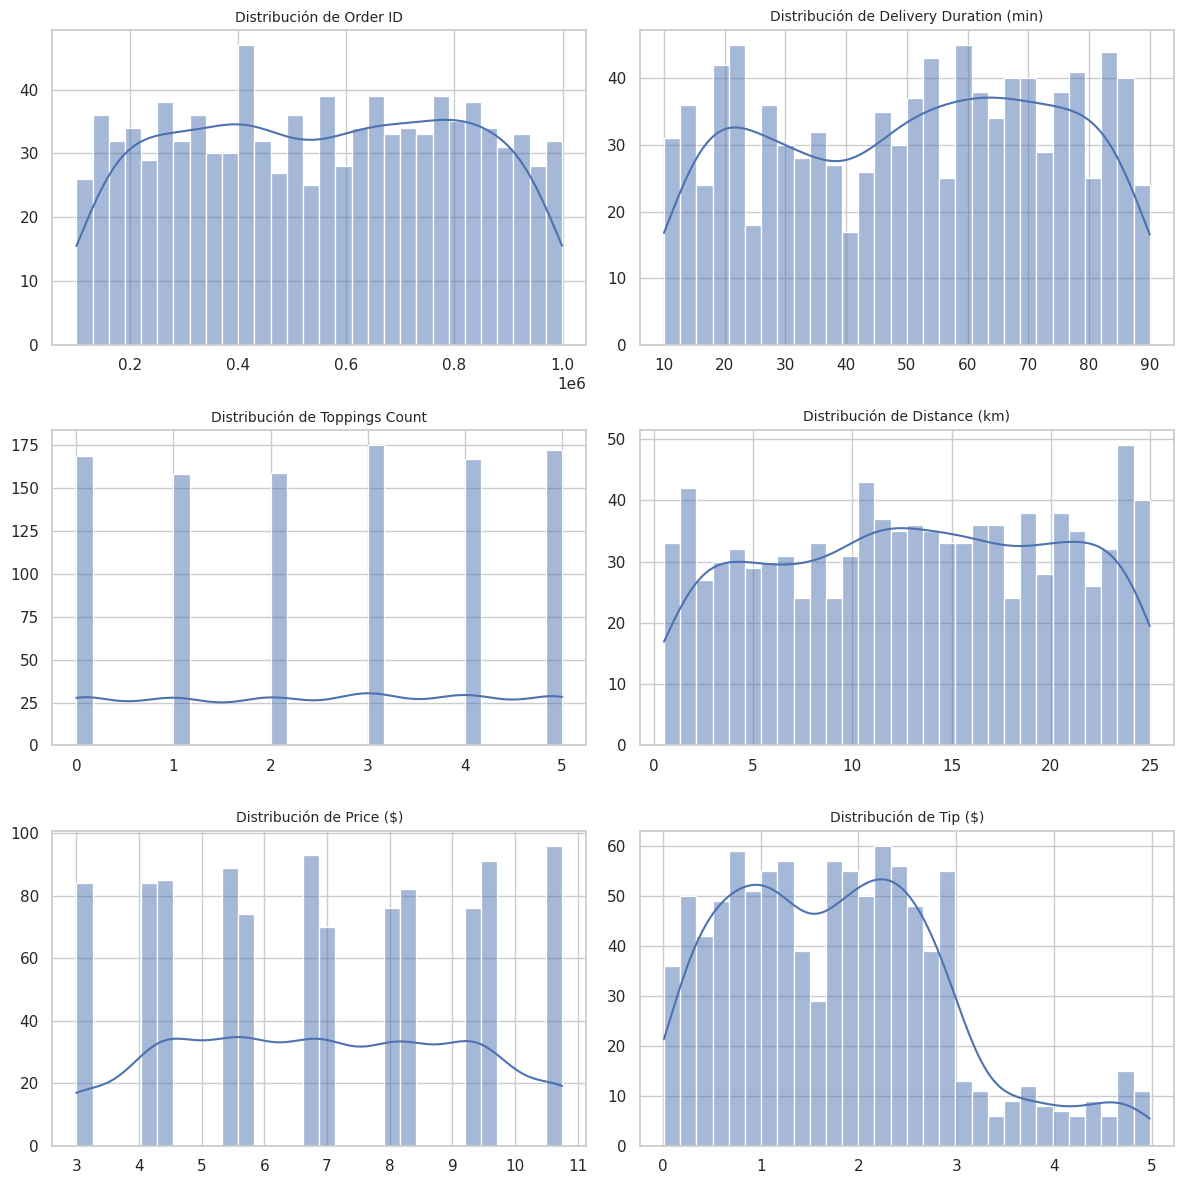

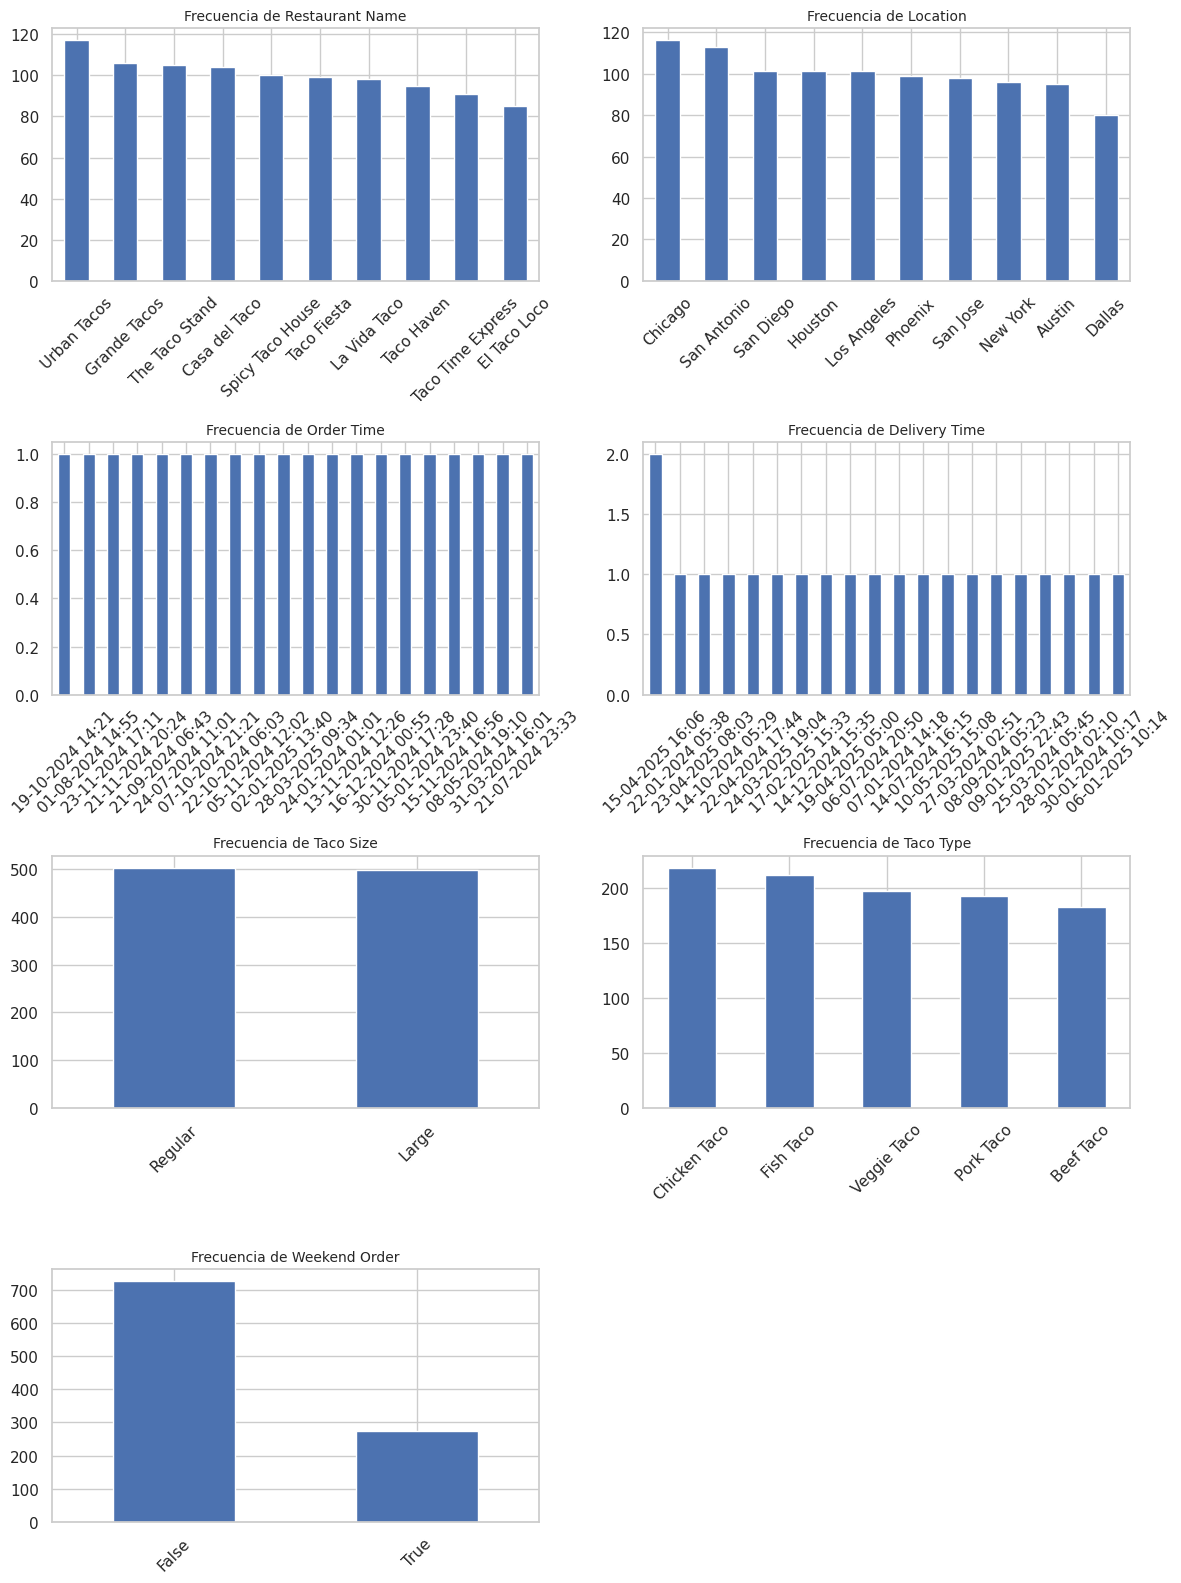

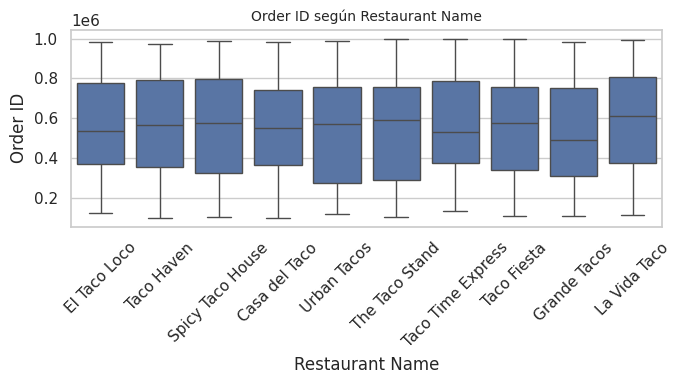

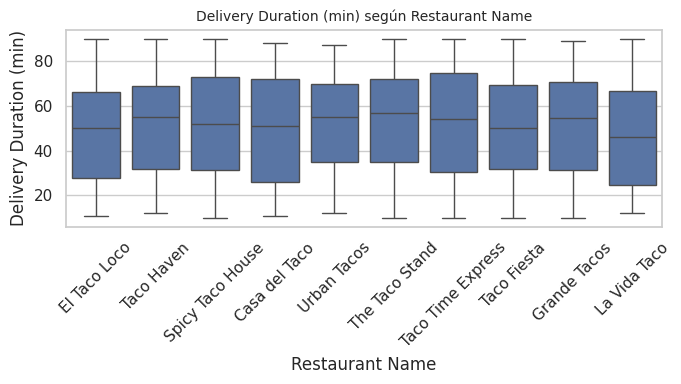

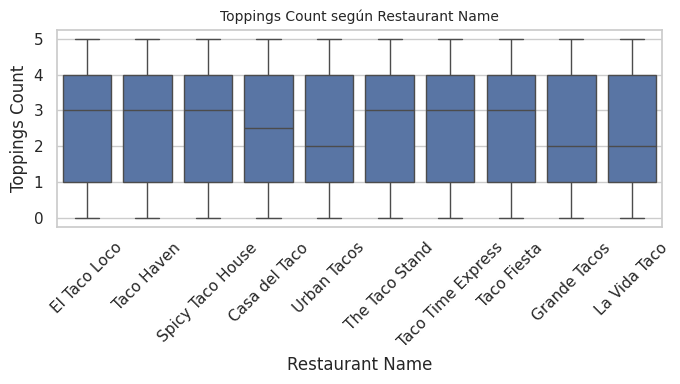

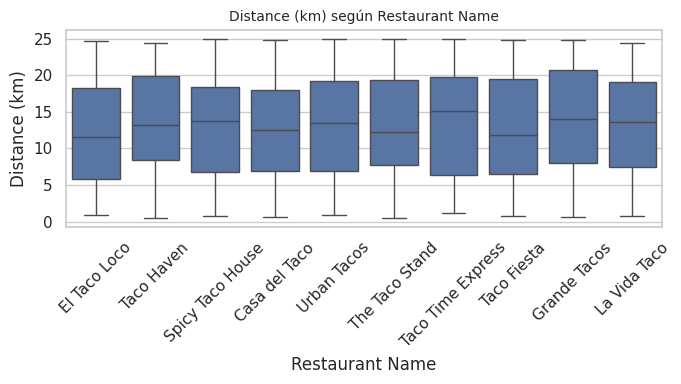

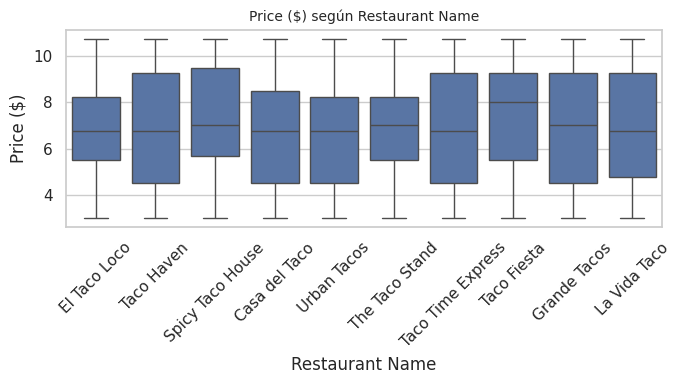

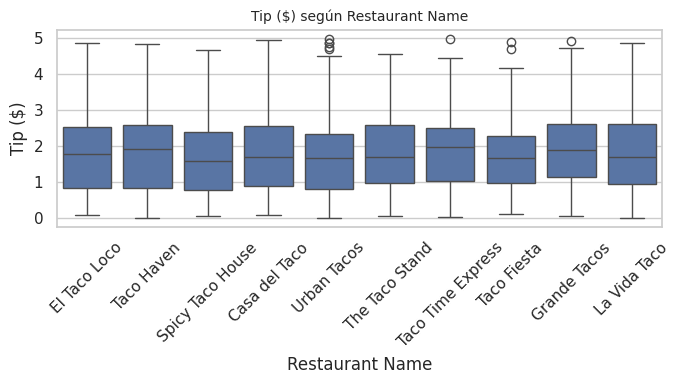

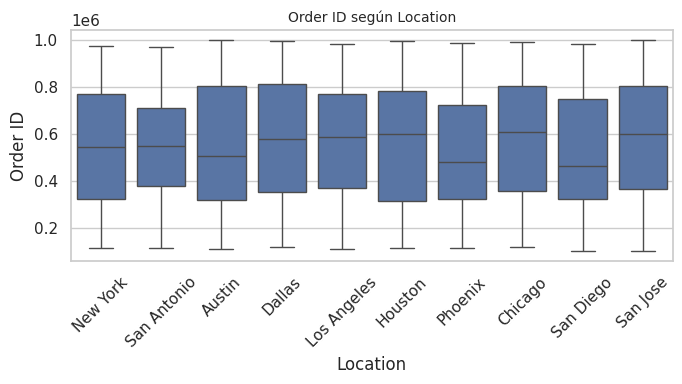

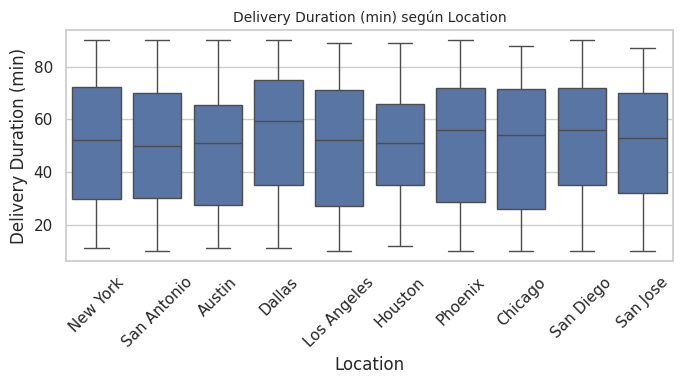

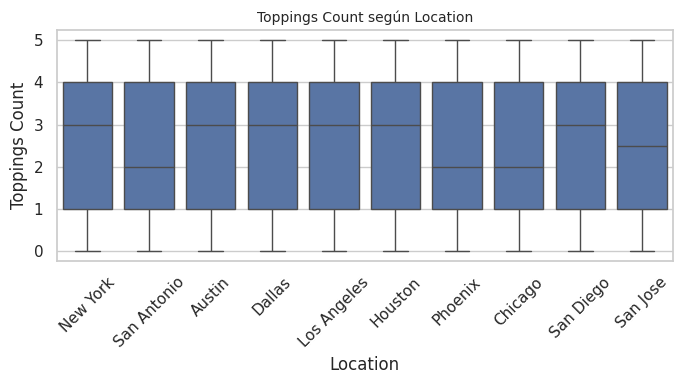

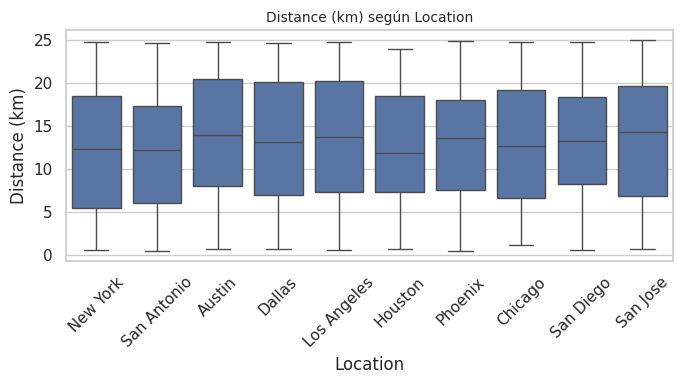

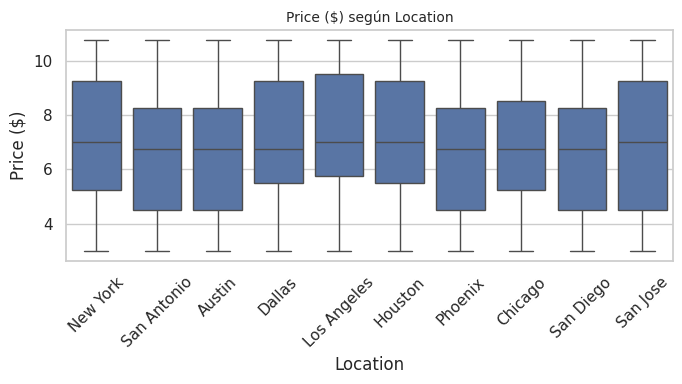

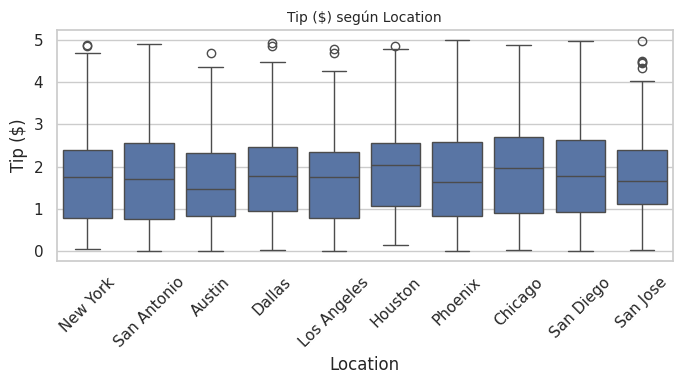

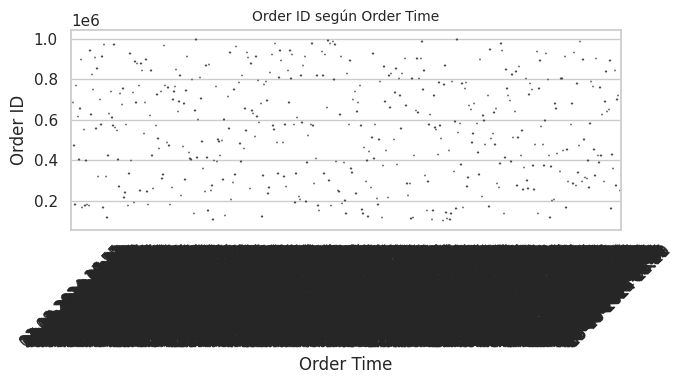

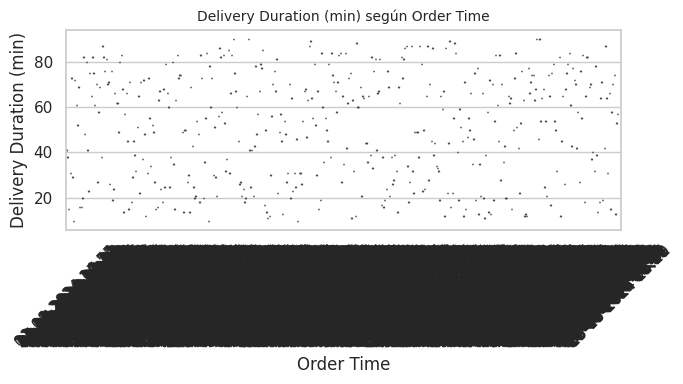

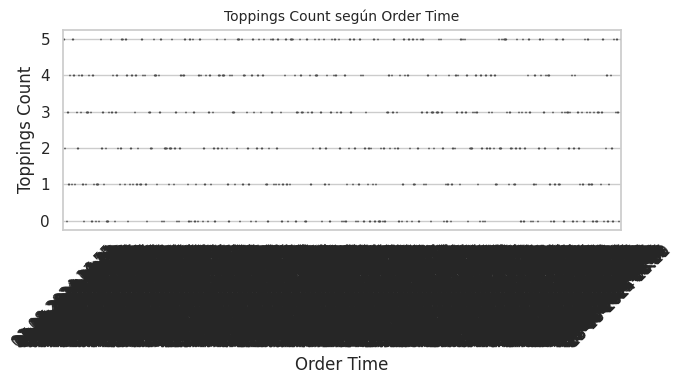

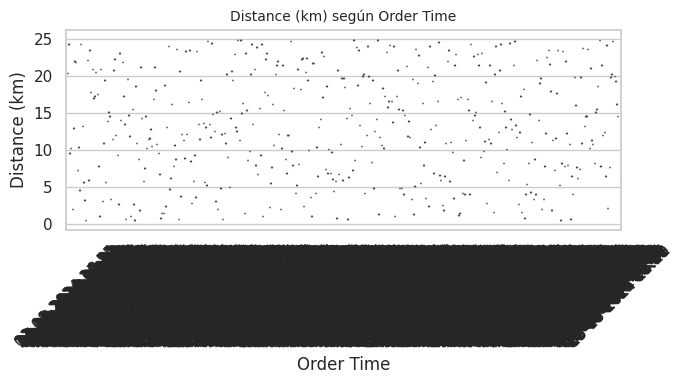

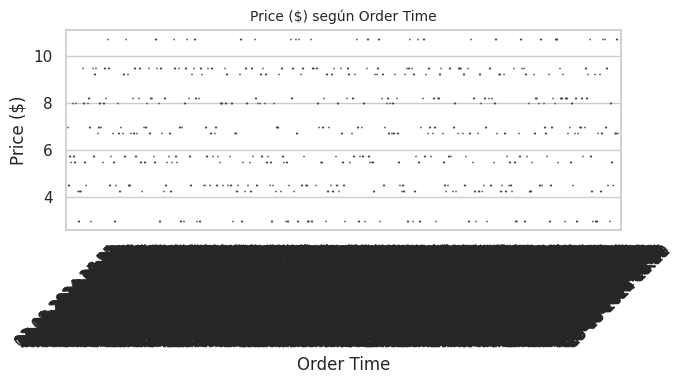

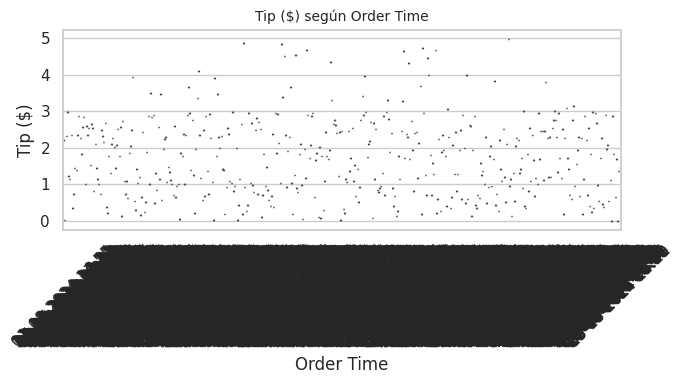

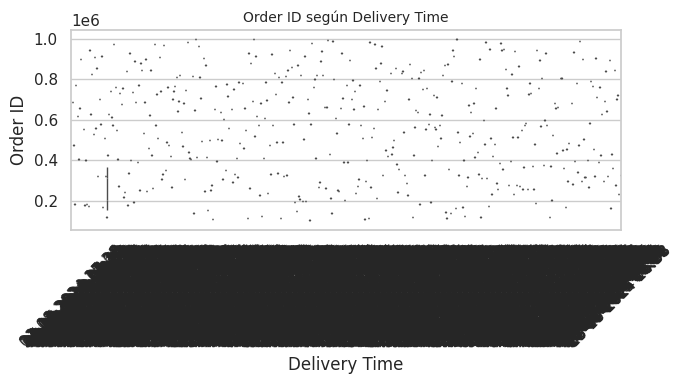

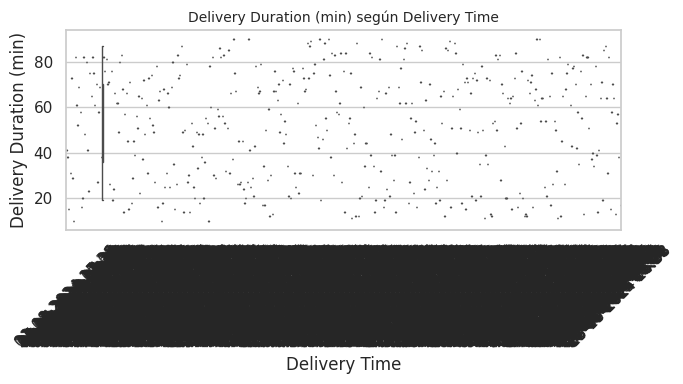

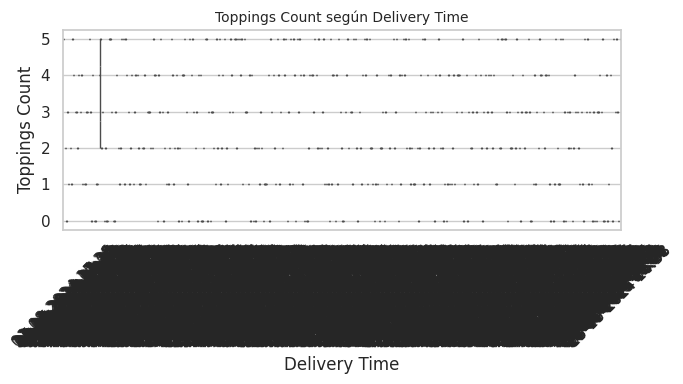

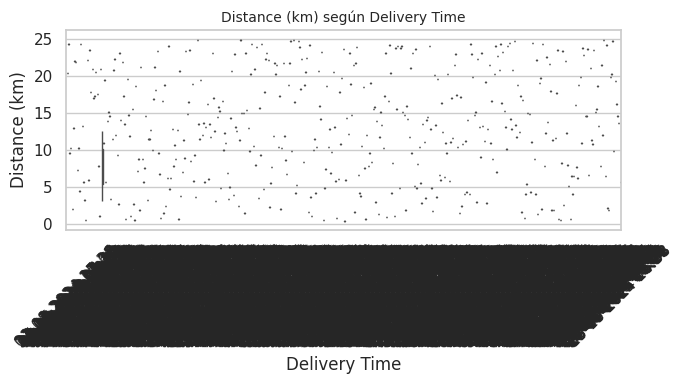

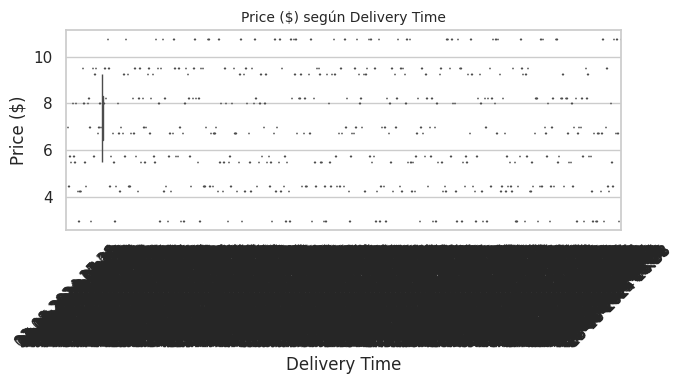

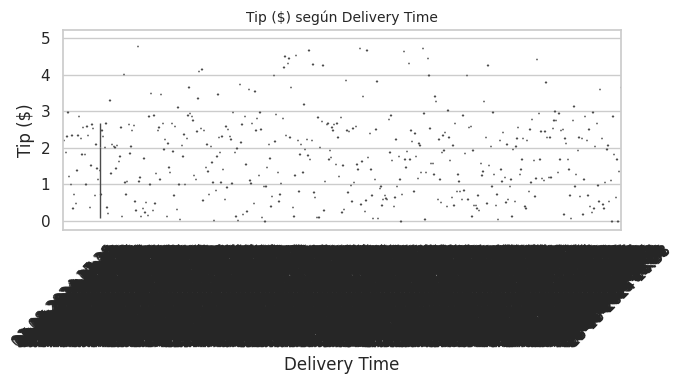

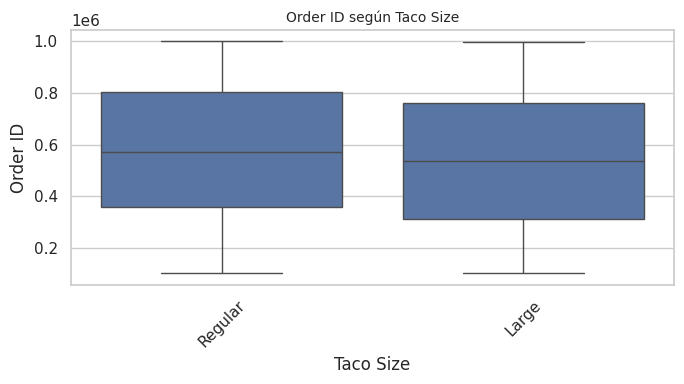

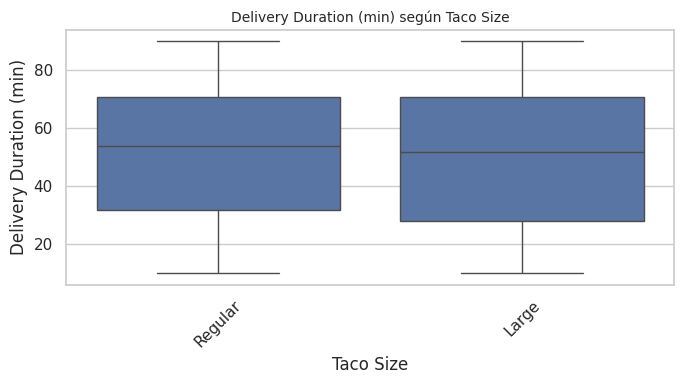

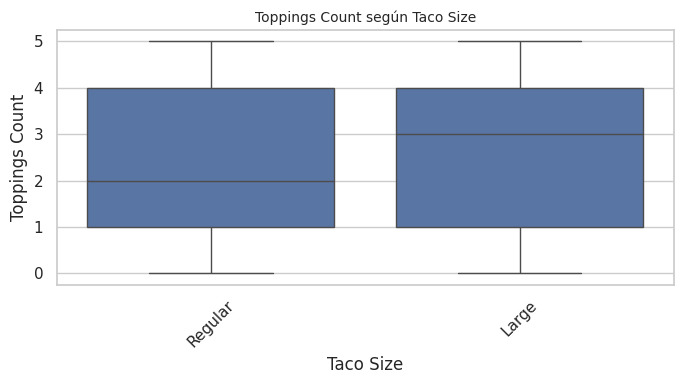

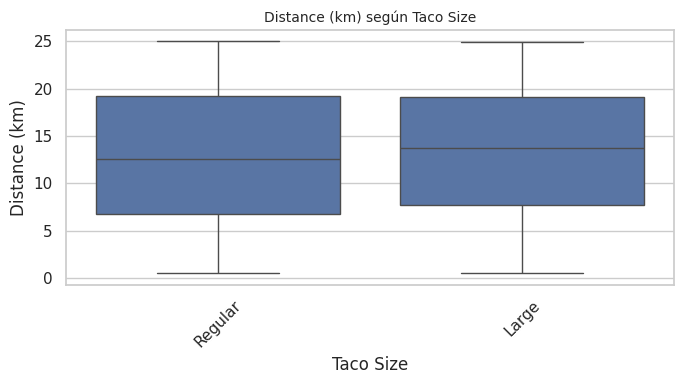

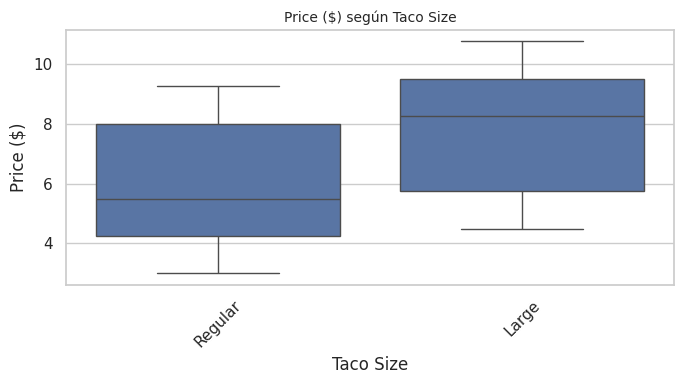

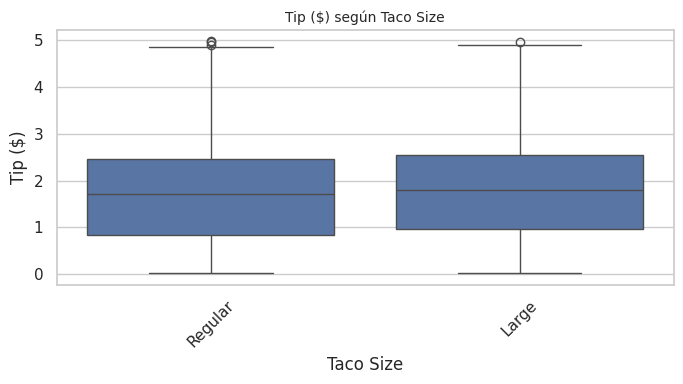

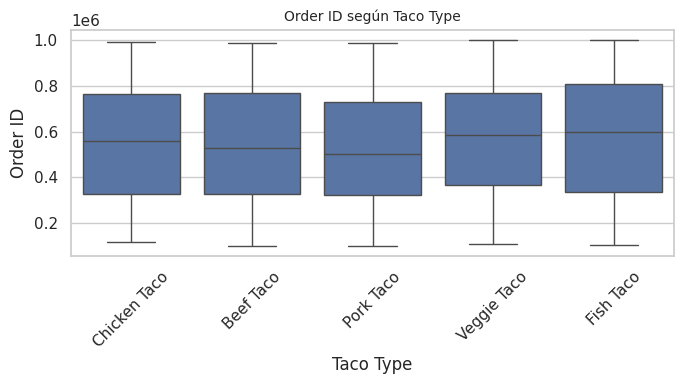

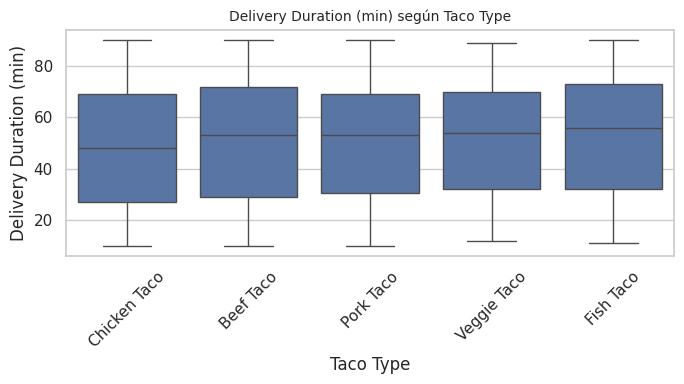

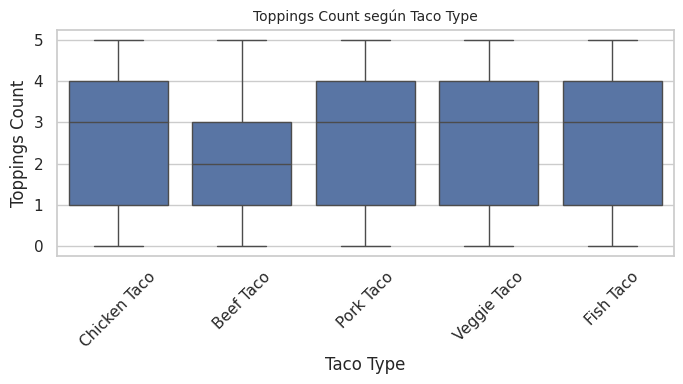

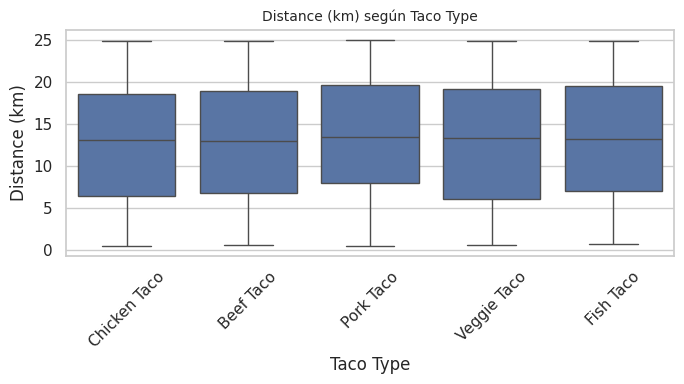

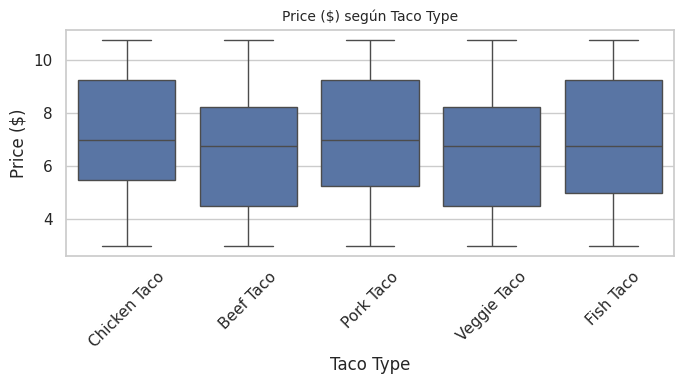

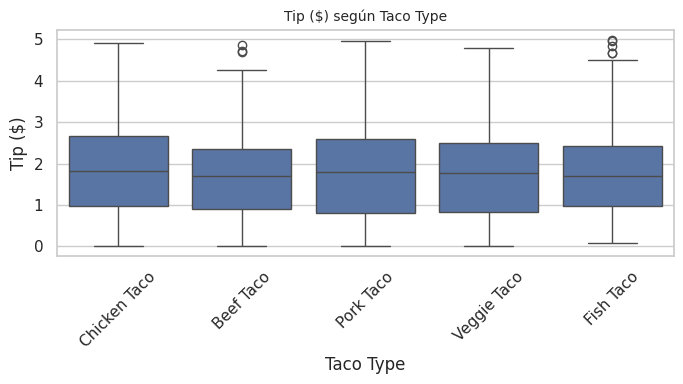

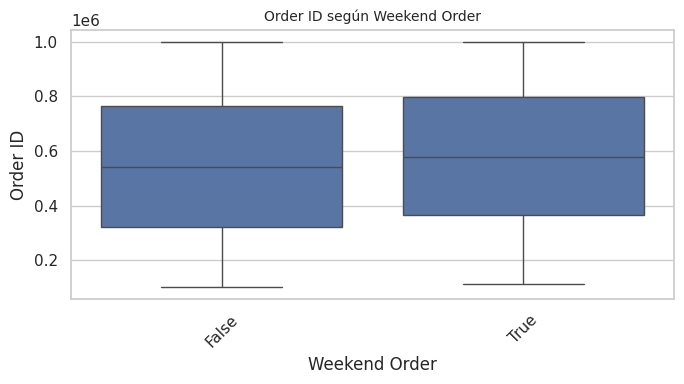

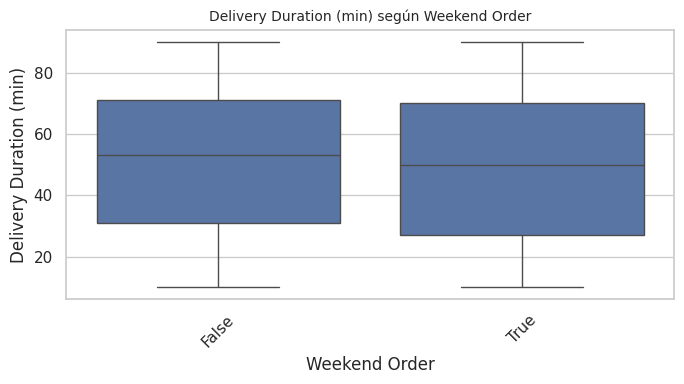

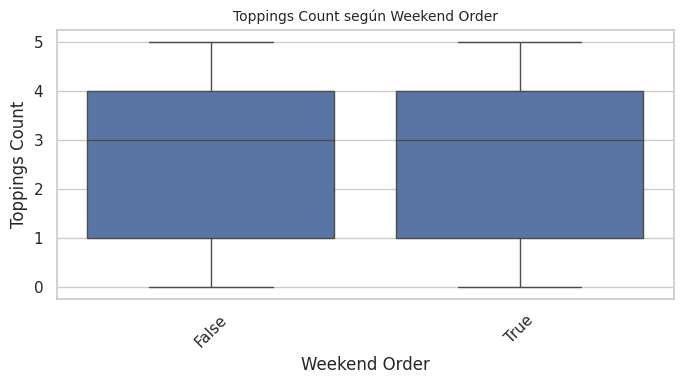

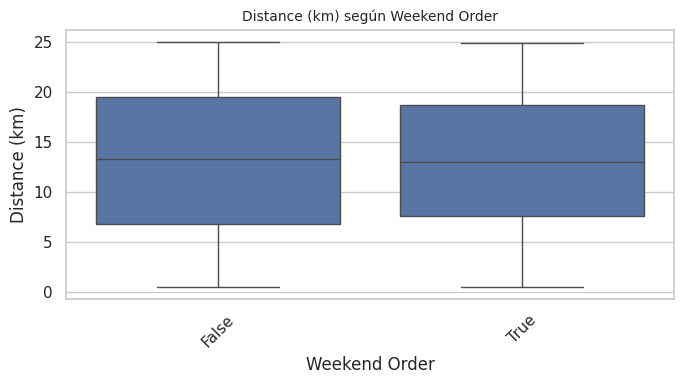

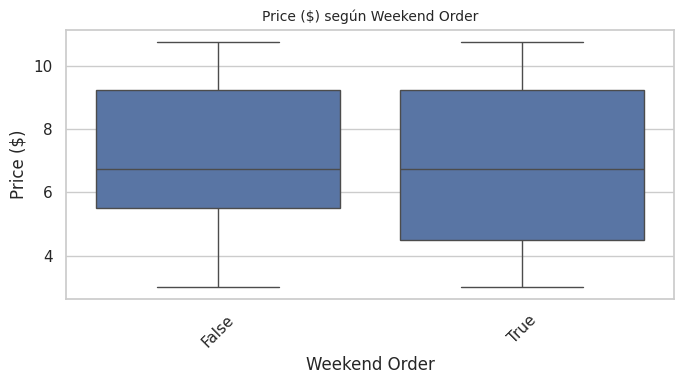

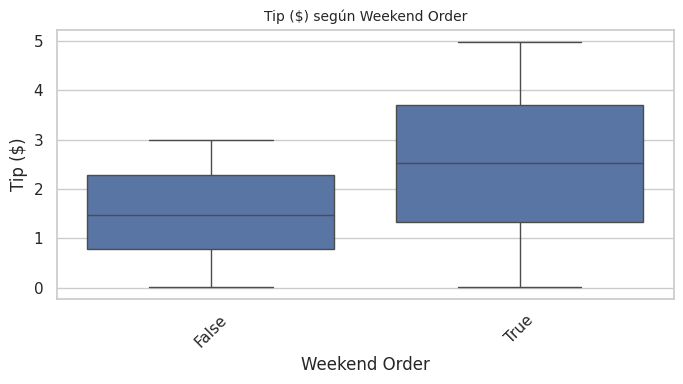

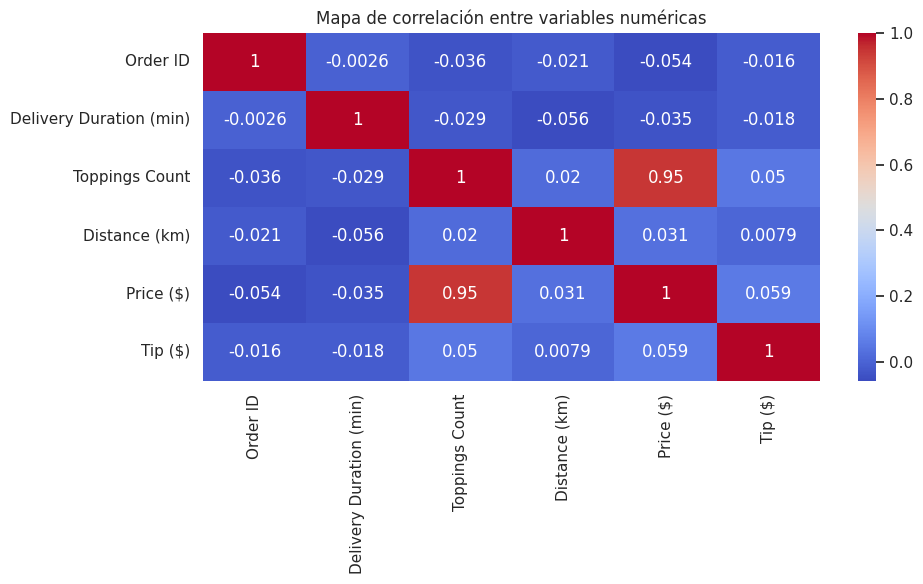

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Cargar dataset
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

# Separar variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 1. HISTOGRAMAS NUMÉRICOS EN GRILLA
def plot_histograms(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[j])
            axes[j].set_title(f'Distribución de {col}', fontsize=10)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 2. BARRAS CATEGÓRICAS EN GRILLA
def plot_bars(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            df[col].value_counts().head(20).plot(kind='bar', ax=axes[j])
            axes[j].set_title(f'Frecuencia de {col}', fontsize=10)
            axes[j].tick_params(axis='x', rotation=45)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 3. BOXPLOTS NUMÉRICO VS CATEGÓRICO EN GRILLA
def plot_boxplots(categorical_cols, numeric_cols):
    pairs = [(cat, num) for cat in categorical_cols for num in numeric_cols]
    cols = 2
    rows = 2  # para no hacer demasiados a la vez
    per_page = cols * rows
    for i in range(0, len(pairs), per_page):
        subset = pairs[i:i + per_page]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, (cat, num) in enumerate(subset):
            try:
                sns.boxplot(x=df[cat], y=df[num], ax=axes[j])
                axes[j].set_title(f'{num} según {cat}', fontsize=10)
                axes[j].tick_params(axis='x', rotation=45)
                axes[j].set_xlabel('')
                axes[j].set_ylabel('')
            except Exception as e:
                axes[j].set_visible(False)

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 4. HEATMAP DE CORRELACIÓN
def plot_corr_heatmap():
    if len(numeric_cols) >= 2:
        plt.figure(figsize=(10, 6))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Mapa de correlación entre variables numéricas', fontsize=12)
        plt.tight_layout()
        plt.show()

# 📊 Ejecutar todo
plot_histograms(numeric_cols)
plot_bars(categorical_cols)
plot_boxplots(categorical_cols, numeric_cols)
plot_corr_heatmap()
